# Нейросеть для предсказания Соотношения матрица-наполнитель

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU 
%matplotlib inline 
sns.set(style="ticks")

В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (mae) и коэффициент детерминации (R2)

In [4]:
# хранение оценок моделей
# y1 - Соотношение матрица-наполнитель

MAE=[]


In [2]:
# Загрузка данных для обучения
df = pd.read_csv('Datasets/df_clean.csv')
df.head()


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [7]:
df.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,518.926167,2.927987,1974.076438,735.845364,111.139456,22.200385,286.210649,482.917197,73.305807,2460.196046,217.961148,46.026059,6.931668,57.570720
std,297.849460,0.895958,71.067625,327.678809,26.767566,2.395220,39.431984,280.197532,3.026672,452.101798,57.107510,45.012744,2.515536,11.125702
min,1.000000,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.793845,1250.392802,72.530873,0.000000,0.037639,28.661632
25%,259.000000,2.319322,1923.255135,498.519344,92.834720,20.555344,259.224491,264.538975,71.252628,2147.576085,179.858423,0.000000,5.140035,50.273632
50%,530.000000,2.908787,1977.302956,734.763985,111.166301,22.177332,286.302097,458.556445,73.253725,2455.555556,218.448971,90.000000,6.968698,57.603262
75%,778.000000,3.550038,2020.108384,956.906660,130.163998,23.957502,313.023467,695.845999,75.310287,2751.228051,256.283235,90.000000,8.613054,64.854936
max,1022.000000,5.314144,2161.565216,1628.000000,181.828448,28.955094,386.067992,1291.340115,81.203147,3636.892992,359.052220,90.000000,13.732404,86.012427


In [3]:
y = df[['Соотношение матрица-наполнитель']]
y.head()

,Соотношение матрица-наполнитель
0,1.857143
1,1.857143
2,2.771331
3,2.767918
4,2.569620


In [4]:
X = df.drop(columns=['Unnamed: 0', 'Соотношение матрица-наполнитель'], axis=1)
X.T

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2000.000000,1910.000000,1900.000000,1930.00,2100.00,2160.00,1990.00,...,1931.146887,2014.772547,1872.864660,1914.629424,2000.506141,1952.087902,2050.089171,1972.372865,2066.799773,1890.413468
"модуль упругости, ГПа",738.736842,738.736842,753.000000,748.000000,807.000000,535.000000,889.00,1421.00,933.00,1628.00,...,554.010341,841.064806,996.018683,680.683701,934.564388,912.855545,444.732634,416.836524,741.475517,417.316232
"Количество отвердителя, м.%",50.000000,129.000000,111.860000,111.860000,111.860000,111.860000,129.00,129.00,129.00,129.00,...,96.749782,102.979906,146.199194,110.979100,143.021859,86.992183,145.981978,110.533477,141.397963,129.183416
"Содержание эпоксидных групп,%_2",23.750000,21.250000,22.267857,22.267857,22.267857,22.267857,21.25,21.25,21.25,21.25,...,22.146487,21.073367,21.559290,25.922635,21.379518,20.123249,19.599769,23.957502,19.246945,27.474763
"Температура вспышки, С_2",284.615385,300.000000,284.615385,284.615385,284.615385,284.615385,300.00,300.00,300.00,300.00,...,214.827727,271.490843,313.900486,309.796388,273.852679,324.774576,254.215401,248.423047,275.779840,300.952708
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000,380.000000,380.00,1010.00,1010.00,1010.00,...,56.242761,615.168127,799.634090,628.364550,65.105965,209.198700,350.660830,740.142791,641.468152,758.747882
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000,75.000000,75.00,78.00,78.00,78.00,...,78.143609,79.154469,72.815552,76.030555,67.633752,73.090961,72.920827,74.734344,74.042708,74.309704
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1800.000000,1800.00,2000.00,2000.00,2000.00,...,1939.307550,2518.516089,2443.482888,2466.925422,3102.539548,2387.292495,2360.392784,2662.906040,2071.715856,2856.328932
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000,120.000000,120.00,300.00,300.00,300.00,...,87.270139,232.428214,307.265172,152.184720,229.780372,125.007669,117.730099,236.606764,197.126067,194.754342
"Угол нашивки, град",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000


In [5]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [11]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [12]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.3, random_state=42, shuffle=True)


In [13]:
 X_test_norm

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,0.738395,0.440497,0.567588,0.403313,0.283206,0.172340,0.688223,0.440136,0.592926,0.0,0.430962,0.875073
377,0.217913,0.614463,0.801616,0.529633,0.526186,0.215701,0.576391,0.826824,0.306343,0.0,0.503770,0.656966
538,0.369363,0.365845,0.642552,0.463827,0.720931,0.473159,0.801814,0.940644,0.624456,1.0,0.462686,0.482478
296,0.703961,0.391876,0.494342,0.337834,0.681121,0.166470,0.238380,0.350098,0.530558,0.0,0.661454,0.462011
531,0.539152,0.349106,0.263748,0.577148,0.806815,0.496862,0.666600,0.789805,0.566806,1.0,0.591613,0.482378
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.829071,0.468644,0.452294,0.541788,0.575093,0.550558,0.537128,0.629104,0.156250,0.0,0.576148,0.151102
133,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.446885,0.350083,0.672341,0.0,0.291997,0.552182
490,0.312508,0.496594,0.697279,0.466942,0.498268,0.061419,0.583135,0.739767,0.632369,1.0,0.420066,0.479449
558,0.360882,0.231856,0.452929,0.173665,0.376940,0.028686,0.949168,0.314862,0.291147,1.0,0.308641,0.393330


In [14]:
 X_test

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,2062.918247,718.492638,119.924425,21.043501,237.911236,223.049480,76.398875,2300.777919,242.416875,0,5.939560,78.847771
377,1866.653447,1001.285793,153.427803,22.718403,288.133573,279.016949,74.675634,3223.607474,160.304704,0,6.936649,66.339135
538,1923.762595,597.141517,130.656142,21.845865,328.386305,611.326829,78.149231,3495.239969,251.450925,90,6.374020,56.332103
296,2049.933793,639.456649,109.438533,20.175300,320.157689,215.472646,69.467120,2085.900710,224.547176,0,9.096101,55.158340
531,1987.787140,569.930605,76.426670,23.348416,346.137893,641.922189,76.065686,3135.262653,234.932782,90,8.139645,56.326376
...,...,...,...,...,...,...,...,...,...,...,...,...
420,2097.110886,764.246548,103.418855,22.879573,298.242389,711.229254,74.070615,2751.750346,117.299954,0,7.927846,37.327435
133,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039,0,4.036464,60.329680
490,1902.323754,809.682112,138.490884,21.887169,282.363184,79.879899,74.779541,3015.846986,253.718185,90,5.790341,56.158437
558,1920.564566,379.333489,103.509806,17.998559,257.285562,37.629351,80.419862,2001.811014,155.950624,90,4.264403,51.219411


In [15]:
X_train_norm.shape

(644, 12)

In [16]:
X_test_norm.shape

(277, 12)

In [17]:
y_train_norm.shape

(644, 1)

In [15]:
y_test_norm.shape

(277, 1)

### Полносвязная нейронная сеть

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
19/19 - 1s - loss: 0.9419 - mae: 0.9400 - val_loss: 0.4720 - val_mae: 0.6619 - 876ms/epoch - 46ms/step
Epoch 2/150
19/19 - 0s - loss: 0.2524 - mae: 0.4393 - val_loss: 0.0630 - va

Epoch 65/150
19/19 - 0s - loss: 0.0359 - mae: 0.1519 - val_loss: 0.0347 - val_mae: 0.1537 - 43ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0363 - mae: 0.1519 - val_loss: 0.0348 - val_mae: 0.1532 - 39ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0368 - mae: 0.1524 - val_loss: 0.0346 - val_mae: 0.1533 - 41ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0363 - mae: 0.1526 - val_loss: 0.0347 - val_mae: 0.1537 - 38ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0349 - val_mae: 0.1534 - 42ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0358 - mae: 0.1503 - val_loss: 0.0347 - val_mae: 0.1537 - 39ms/epoch - 2ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0358 - mae: 0.1516 - val_loss: 0.0347 - val_mae: 0.1533 - 40ms/epoch - 2ms/step
Epoch 72/150
19/19 - 0s - loss: 0.0359 - mae: 0.1517 - val_loss: 0.0346 - val_mae: 0.1535 - 38ms/epoch - 2ms/step
Epoch 73/150
19/19 - 0s - loss: 0.0357 - mae: 0.1517 - val_loss: 0.0347 - val_mae: 0.153

Epoch 137/150
19/19 - 0s - loss: 0.0362 - mae: 0.1529 - val_loss: 0.0347 - val_mae: 0.1533 - 50ms/epoch - 3ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0363 - mae: 0.1516 - val_loss: 0.0346 - val_mae: 0.1537 - 34ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0360 - mae: 0.1514 - val_loss: 0.0347 - val_mae: 0.1533 - 50ms/epoch - 3ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0361 - mae: 0.1516 - val_loss: 0.0346 - val_mae: 0.1533 - 33ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0363 - mae: 0.1525 - val_loss: 0.0346 - val_mae: 0.1532 - 34ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0346 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0359 - mae: 0.1518 - val_loss: 0.0347 - val_mae: 0.1532 - 33ms/epoch - 2ms/step
Epoch 144/150
19/19 - 0s - loss: 0.0360 - mae: 0.1512 - val_loss: 0.0346 - val_mae: 0.1535 - 51ms/epoch - 3ms/step
Epoch 145/150
19/19 - 0s - loss: 0.0359 - mae: 0.1515 - val_loss: 0.0346 - val_m

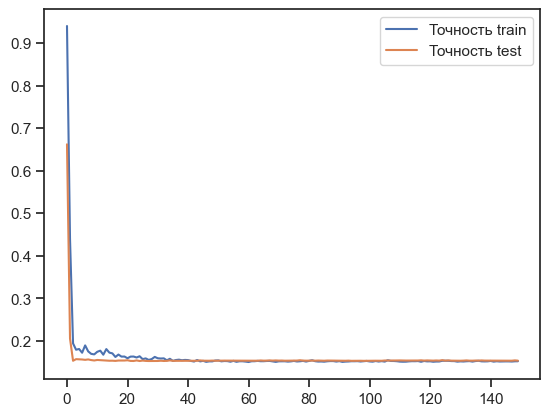

In [18]:
# модель полносвязной нейронной сети для целевого параметра y1
modelNN_y = Sequential()
modelNN_y.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y.add(Dropout(0.5))
modelNN_y.add(Dense(32, activation = 'sigmoid'))
modelNN_y.add(Dense(1, activation = 'tanh'))
modelNN_y.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y.summary()
history = modelNN_y.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                208       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
19/19 - 1s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 568ms/epoch - 30ms/step
Epoch 2/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - 

Epoch 65/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 39ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 36ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 37ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 36ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 39ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 41ms/epoch - 2ms/step
Epoch 71/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 40ms/epoch - 2ms/step
Epoch 72/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 42ms/epoch - 2ms/step
Epoch 73/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.506

Epoch 137/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 42ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 41ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 42ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 41ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 43ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 42ms/epoch - 2ms/step
Epoch 143/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 41ms/epoch - 2ms/step
Epoch 144/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_mae: 0.5060 - 43ms/epoch - 2ms/step
Epoch 145/150
19/19 - 0s - loss: 0.2819 - mae: 0.4962 - val_loss: 0.2906 - val_m

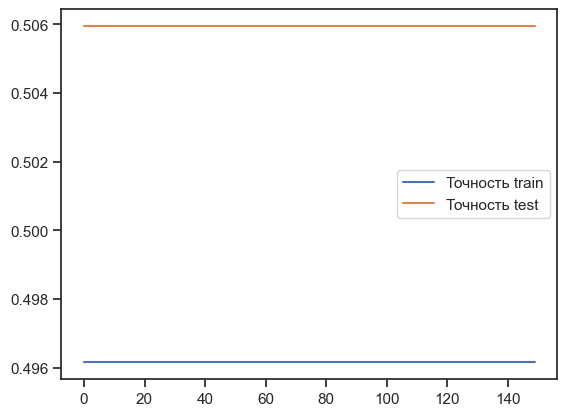

In [20]:
# модель полносвязной нейронной сети тренируем на нормализованных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y1.add(Dropout(0.5))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'relu'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                416       
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 64)                2112      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                

Epoch 62/150
19/19 - 0s - loss: 0.0363 - mae: 0.1530 - val_loss: 0.0347 - val_mae: 0.1534 - 43ms/epoch - 2ms/step
Epoch 63/150
19/19 - 0s - loss: 0.0362 - mae: 0.1527 - val_loss: 0.0349 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0362 - mae: 0.1521 - val_loss: 0.0346 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0358 - mae: 0.1512 - val_loss: 0.0347 - val_mae: 0.1534 - 45ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0362 - mae: 0.1516 - val_loss: 0.0346 - val_mae: 0.1539 - 43ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0360 - mae: 0.1522 - val_loss: 0.0351 - val_mae: 0.1537 - 42ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0361 - mae: 0.1517 - val_loss: 0.0349 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0360 - mae: 0.1514 - val_loss: 0.0346 - val_mae: 0.1538 - 43ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0361 - mae: 0.1517 - val_loss: 0.0346 - val_mae: 0.153

Epoch 134/150
19/19 - 0s - loss: 0.0362 - mae: 0.1521 - val_loss: 0.0347 - val_mae: 0.1534 - 31ms/epoch - 2ms/step
Epoch 135/150
19/19 - 0s - loss: 0.0359 - mae: 0.1510 - val_loss: 0.0348 - val_mae: 0.1546 - 31ms/epoch - 2ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0373 - mae: 0.1554 - val_loss: 0.0354 - val_mae: 0.1539 - 47ms/epoch - 2ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0363 - mae: 0.1519 - val_loss: 0.0346 - val_mae: 0.1536 - 47ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0362 - mae: 0.1525 - val_loss: 0.0357 - val_mae: 0.1541 - 31ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0375 - mae: 0.1539 - val_loss: 0.0347 - val_mae: 0.1542 - 47ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0359 - mae: 0.1515 - val_loss: 0.0348 - val_mae: 0.1535 - 47ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0361 - mae: 0.1521 - val_loss: 0.0347 - val_mae: 0.1534 - 47ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0362 - mae: 0.1522 - val_loss: 0.0347 - val_m

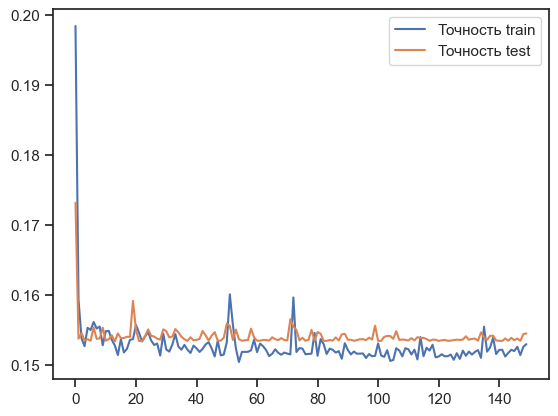

In [23]:
# модель полносвязной нейронной сети тренируем на нормализованных данных
modelNN_y2 = Sequential([
                Dense(32,  input_dim=12, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                208       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 32)                544       
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-train

Epoch 63/150
19/19 - 0s - loss: 0.0361 - mae: 0.1518 - val_loss: 0.0347 - val_mae: 0.1535 - 42ms/epoch - 2ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0367 - mae: 0.1529 - val_loss: 0.0349 - val_mae: 0.1536 - 46ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0350 - val_mae: 0.1536 - 44ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0364 - mae: 0.1533 - val_loss: 0.0347 - val_mae: 0.1534 - 41ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0362 - mae: 0.1516 - val_loss: 0.0350 - val_mae: 0.1536 - 42ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0364 - mae: 0.1514 - val_loss: 0.0346 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0357 - mae: 0.1516 - val_loss: 0.0349 - val_mae: 0.1536 - 45ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0362 - mae: 0.1523 - val_loss: 0.0348 - val_mae: 0.1535 - 42ms/epoch - 2ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0362 - mae: 0.1525 - val_loss: 0.0352 - val_mae: 0.153

Epoch 135/150
19/19 - 0s - loss: 0.0362 - mae: 0.1526 - val_loss: 0.0350 - val_mae: 0.1537 - 43ms/epoch - 2ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0366 - mae: 0.1523 - val_loss: 0.0347 - val_mae: 0.1541 - 42ms/epoch - 2ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0365 - mae: 0.1522 - val_loss: 0.0347 - val_mae: 0.1536 - 42ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0362 - mae: 0.1525 - val_loss: 0.0349 - val_mae: 0.1536 - 40ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0358 - mae: 0.1507 - val_loss: 0.0347 - val_mae: 0.1534 - 50ms/epoch - 3ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0359 - mae: 0.1517 - val_loss: 0.0346 - val_mae: 0.1534 - 33ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0360 - mae: 0.1525 - val_loss: 0.0347 - val_mae: 0.1534 - 50ms/epoch - 3ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0364 - mae: 0.1528 - val_loss: 0.0346 - val_mae: 0.1535 - 53ms/epoch - 3ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0361 - mae: 0.1521 - val_loss: 0.0349 - val_m

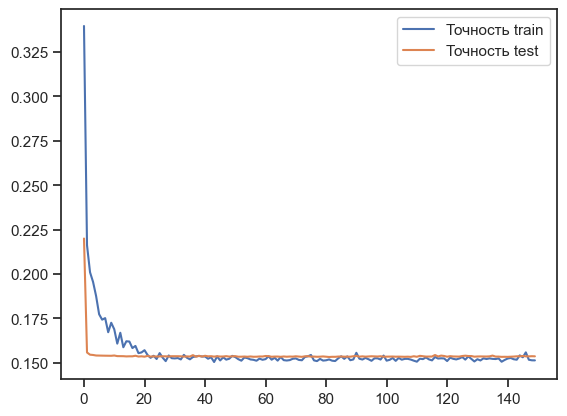

In [27]:
# модель полносвязной нейронной сети для целевого параметра y3 тренируем на нормализованных данных
modelNN_y3 = Sequential()
modelNN_y3.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y3.add(Dropout(0.5))
modelNN_y3.add(Dense(32, activation = 'sigmoid'))
modelNN_y3.add(Dropout(0.5))
modelNN_y3.add(Dense(16, activation = 'sigmoid'))
modelNN_y3.add(Dense(1, activation = 'tanh'))
modelNN_y3.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y3.summary()
history = modelNN_y3.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                832       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-train

Epoch 63/150
19/19 - 0s - loss: 0.0363 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1534 - 45ms/epoch - 2ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0363 - mae: 0.1530 - val_loss: 0.0346 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0363 - mae: 0.1520 - val_loss: 0.0348 - val_mae: 0.1535 - 44ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0359 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1534 - 42ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0359 - mae: 0.1514 - val_loss: 0.0348 - val_mae: 0.1535 - 34ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0358 - mae: 0.1514 - val_loss: 0.0346 - val_mae: 0.1534 - 49ms/epoch - 3ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0363 - mae: 0.1527 - val_loss: 0.0346 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0361 - mae: 0.1514 - val_loss: 0.0347 - val_mae: 0.1534 - 52ms/epoch - 3ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0362 - mae: 0.1525 - val_loss: 0.0348 - val_mae: 0.153

Epoch 135/150
19/19 - 0s - loss: 0.0360 - mae: 0.1511 - val_loss: 0.0350 - val_mae: 0.1536 - 33ms/epoch - 2ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0358 - mae: 0.1514 - val_loss: 0.0346 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0349 - val_mae: 0.1536 - 52ms/epoch - 3ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0359 - mae: 0.1508 - val_loss: 0.0348 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0360 - mae: 0.1515 - val_loss: 0.0347 - val_mae: 0.1534 - 36ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0365 - mae: 0.1534 - val_loss: 0.0346 - val_mae: 0.1538 - 50ms/epoch - 3ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0349 - val_mae: 0.1536 - 50ms/epoch - 3ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0361 - mae: 0.1514 - val_loss: 0.0348 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0359 - mae: 0.1512 - val_loss: 0.0349 - val_m

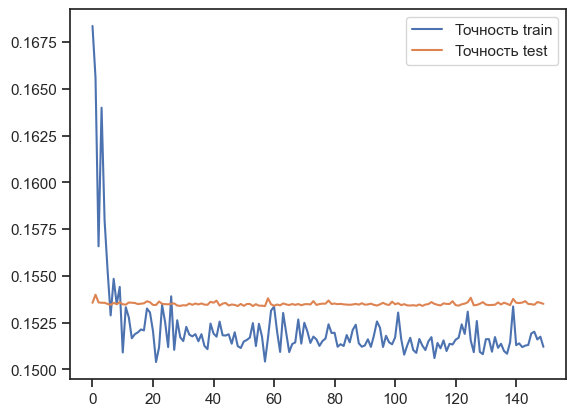

In [28]:
# модель полносвязной нейронной сети для целевого параметра y4 тренируем на нормализованных данных
modelNN_y4 = Sequential()
modelNN_y4.add(Dense(64,  input_dim=12, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(32, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(16, activation = 'sigmoid'))
modelNN_y4.add(Dense(1, activation = 'tanh'))
modelNN_y4.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y4.summary()
history = modelNN_y4.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               1664      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 16)              

Epoch 60/200
19/19 - 0s - loss: 0.0358 - mae: 0.1509 - val_loss: 0.0346 - val_mae: 0.1538 - 49ms/epoch - 3ms/step
Epoch 61/200
19/19 - 0s - loss: 0.0358 - mae: 0.1507 - val_loss: 0.0348 - val_mae: 0.1535 - 47ms/epoch - 2ms/step
Epoch 62/200
19/19 - 0s - loss: 0.0360 - mae: 0.1517 - val_loss: 0.0348 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 63/200
19/19 - 0s - loss: 0.0361 - mae: 0.1519 - val_loss: 0.0347 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 64/200
19/19 - 0s - loss: 0.0363 - mae: 0.1517 - val_loss: 0.0347 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 65/200
19/19 - 0s - loss: 0.0359 - mae: 0.1518 - val_loss: 0.0346 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 66/200
19/19 - 0s - loss: 0.0356 - mae: 0.1506 - val_loss: 0.0348 - val_mae: 0.1536 - 49ms/epoch - 3ms/step
Epoch 67/200
19/19 - 0s - loss: 0.0363 - mae: 0.1520 - val_loss: 0.0347 - val_mae: 0.1535 - 48ms/epoch - 3ms/step
Epoch 68/200
19/19 - 0s - loss: 0.0360 - mae: 0.1520 - val_loss: 0.0346 - val_mae: 0.154

Epoch 132/200
19/19 - 0s - loss: 0.0356 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 133/200
19/19 - 0s - loss: 0.0358 - mae: 0.1510 - val_loss: 0.0347 - val_mae: 0.1535 - 45ms/epoch - 2ms/step
Epoch 134/200
19/19 - 0s - loss: 0.0359 - mae: 0.1509 - val_loss: 0.0346 - val_mae: 0.1536 - 49ms/epoch - 3ms/step
Epoch 135/200
19/19 - 0s - loss: 0.0361 - mae: 0.1515 - val_loss: 0.0349 - val_mae: 0.1536 - 49ms/epoch - 3ms/step
Epoch 136/200
19/19 - 0s - loss: 0.0360 - mae: 0.1519 - val_loss: 0.0346 - val_mae: 0.1537 - 50ms/epoch - 3ms/step
Epoch 137/200
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0347 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 138/200
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0346 - val_mae: 0.1537 - 50ms/epoch - 3ms/step
Epoch 139/200
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0347 - val_mae: 0.1535 - 61ms/epoch - 3ms/step
Epoch 140/200
19/19 - 0s - loss: 0.0360 - mae: 0.1519 - val_loss: 0.0348 - val_m

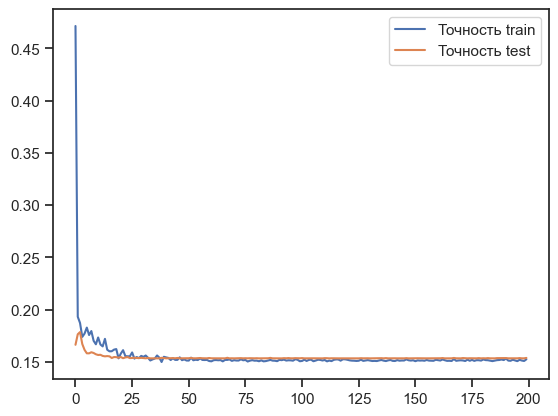

In [29]:
# модель полносвязной нейронной сети для целевого параметра y4 тренируем на нормализованных данных
modelNN_y4 = Sequential()
modelNN_y4.add(Dense(128,  input_dim=12, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(64, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(32, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(16, activation = 'sigmoid'))
modelNN_y4.add(Dense(1, activation = 'tanh'))
modelNN_y4.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y4.summary()
history = modelNN_y4.fit(X_train_norm,y_train_norm, 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1300      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

Epoch 63/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1536 - 49ms/epoch - 3ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1535 - 48ms/epoch - 3ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0357 - mae: 0.1512 - val_loss: 0.0346 - val_mae: 0.1536 - 43ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0357 - mae: 0.1512 - val_loss: 0.0346 - val_mae: 0.1535 - 37ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.1535 - 51ms/epoch - 3ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.1535 - 49ms/epoch - 3ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0347 - val_mae: 0.1535 - 61ms/epoch - 3ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.153

Epoch 135/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1535 - 37ms/epoch - 2ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0347 - val_mae: 0.1535 - 50ms/epoch - 3ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.1535 - 48ms/epoch - 3ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0358 - mae: 0.1510 - val_loss: 0.0348 - val_mae: 0.1536 - 33ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0358 - mae: 0.1510 - val_loss: 0.0348 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0347 - val_mae: 0.1535 - 39ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.1535 - 34ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0348 - val_mae: 0.1535 - 34ms/epoch - 2ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0358 - mae: 0.1511 - val_loss: 0.0349 - val_m

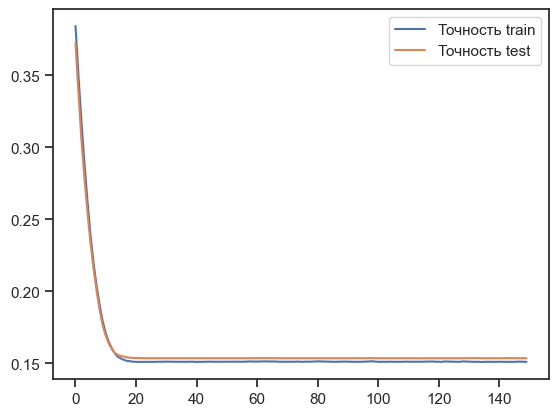

In [19]:
# 5 
model_y5= Sequential()
model_y5.add(Dense(100, input_dim=12, activation='sigmoid'))
model_y5.add(LeakyReLU(alpha=1.0))
model_y5.add(Dense(50, activation='sigmoid'))
model_y5.add(LeakyReLU(alpha=1.0))
model_y5.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model_y5.add(Dense(1, activation='linear'))
model_y5.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y5.summary()
history = model_y5.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 100)               1300      
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_68 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_69 (Dense)            (None, 25)                1275      
                                                                 
 dense_70 (Dense)            (None, 1)               

Epoch 62/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0346 - val_mae: 0.1534 - 44ms/epoch - 2ms/step
Epoch 63/150
19/19 - 0s - loss: 0.0357 - mae: 0.1512 - val_loss: 0.0346 - val_mae: 0.1535 - 47ms/epoch - 2ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0358 - mae: 0.1516 - val_loss: 0.0346 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1534 - 43ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1534 - 42ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0358 - mae: 0.1514 - val_loss: 0.0346 - val_mae: 0.1534 - 46ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1535 - 43ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1534 - 43ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0346 - val_mae: 0.153

Epoch 134/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0347 - val_mae: 0.1533 - 42ms/epoch - 2ms/step
Epoch 135/150
19/19 - 0s - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0346 - val_mae: 0.1533 - 43ms/epoch - 2ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0358 - mae: 0.1515 - val_loss: 0.0346 - val_mae: 0.1536 - 42ms/epoch - 2ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0357 - mae: 0.1511 - val_loss: 0.0347 - val_mae: 0.1533 - 41ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0347 - val_mae: 0.1533 - 43ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0346 - val_mae: 0.1533 - 43ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0357 - mae: 0.1510 - val_loss: 0.0346 - val_mae: 0.1533 - 41ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0346 - val_mae: 0.1535 - 44ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0356 - mae: 0.1508 - val_loss: 0.0347 - val_m

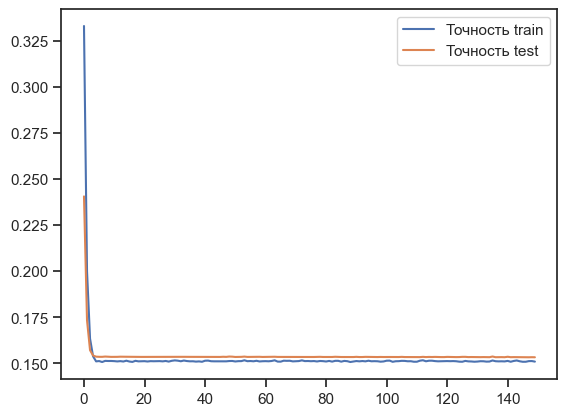

In [34]:
# 6
model_y6= Sequential()
model_y6.add(Dense(100, input_dim=12, activation='sigmoid'))
model_y6.add(Dropout(0.5))
model_y6.add(LeakyReLU(alpha=1.0))
model_y6.add(Dense(50, activation='sigmoid'))
model_y6.add(LeakyReLU(alpha=1.0))
model_y6.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y6.add(Dense(1, activation='linear'))
model_y6.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y6.summary()
history = model_y6.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 16)                208       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_72 (Dense)            (None, 8)                 136       
                                                                 
 dense_73 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
19/19 - 1s - loss: 1.8547 - mae: 1.3411 - v

Epoch 64/150
19/19 - 0s - loss: 0.0444 - mae: 0.1689 - val_loss: 0.0351 - val_mae: 0.1548 - 44ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0445 - mae: 0.1675 - val_loss: 0.0350 - val_mae: 0.1544 - 44ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0454 - mae: 0.1714 - val_loss: 0.0351 - val_mae: 0.1548 - 40ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0450 - mae: 0.1700 - val_loss: 0.0350 - val_mae: 0.1546 - 45ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0470 - mae: 0.1726 - val_loss: 0.0352 - val_mae: 0.1549 - 48ms/epoch - 3ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0460 - mae: 0.1705 - val_loss: 0.0352 - val_mae: 0.1550 - 33ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0467 - mae: 0.1727 - val_loss: 0.0355 - val_mae: 0.1557 - 50ms/epoch - 3ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0451 - mae: 0.1709 - val_loss: 0.0352 - val_mae: 0.1550 - 53ms/epoch - 3ms/step
Epoch 72/150
19/19 - 0s - loss: 0.0441 - mae: 0.1681 - val_loss: 0.0349 - val_mae: 0.154

Epoch 136/150
19/19 - 0s - loss: 0.0386 - mae: 0.1569 - val_loss: 0.0350 - val_mae: 0.1539 - 41ms/epoch - 2ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0375 - mae: 0.1538 - val_loss: 0.0351 - val_mae: 0.1543 - 39ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0372 - mae: 0.1546 - val_loss: 0.0354 - val_mae: 0.1552 - 43ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0374 - mae: 0.1564 - val_loss: 0.0357 - val_mae: 0.1560 - 33ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0374 - mae: 0.1540 - val_loss: 0.0352 - val_mae: 0.1545 - 50ms/epoch - 3ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0378 - mae: 0.1561 - val_loss: 0.0352 - val_mae: 0.1547 - 49ms/epoch - 3ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0379 - mae: 0.1552 - val_loss: 0.0352 - val_mae: 0.1547 - 33ms/epoch - 2ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0368 - mae: 0.1525 - val_loss: 0.0352 - val_mae: 0.1545 - 52ms/epoch - 3ms/step
Epoch 144/150
19/19 - 0s - loss: 0.0361 - mae: 0.1514 - val_loss: 0.0352 - val_m

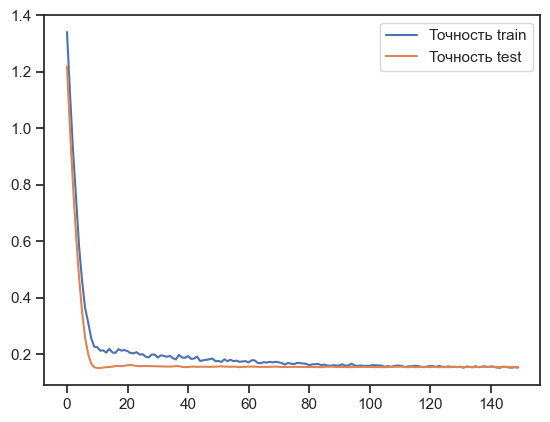

In [42]:
# 7
model_y7= Sequential()
model_y7.add(Dense(16, input_dim=12, activation='sigmoid'))
model_y7.add(Dropout(0.5))
model_y7.add(LeakyReLU(alpha=1.0))
model_y7.add(Dense(8, activation='sigmoid'))

#IMPORTANT PART
model_y7.add(Dense(1, activation='linear'))
model_y7.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y7.summary()
history = model_y7.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [51]:
y_pred = modelNN_y.predict(X_test_norm)
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)
y_pred_3 = modelNN_y3.predict(X_test_norm)
y_pred_4 = modelNN_y4.predict(X_test_norm)
y_pred_5 = model_y5.predict(X_test_norm)
y_pred_6 = model_y6.predict(X_test_norm)
y_pred_7 = model_y7.predict(X_test_norm)

y_pred = scaler_norm_y.inverse_transform (y_pred)
y_pred1 = scaler_norm_y.inverse_transform (y_pred_1)
y_pred2 = scaler_norm_y.inverse_transform (y_pred_2)
y_pred3 = scaler_norm_y.inverse_transform (y_pred_3)
y_pred4 = scaler_norm_y.inverse_transform (y_pred_4)
y_pred5 = scaler_norm_y.inverse_transform (y_pred_5)
y_pred6 = scaler_norm_y.inverse_transform (y_pred_6)
y_pred7 = scaler_norm_y.inverse_transform (y_pred_7)

MAE_0 = mean_absolute_error(y_test,y_pred)
print (MAE_0)
MAE_1 = mean_absolute_error(y_test,y_pred1)
print (MAE_1)
MAE_2 = mean_absolute_error(y_test,y_pred2)
print (MAE_2)
MAE_3 = mean_absolute_error(y_test,y_pred3)
print (MAE_3)
MAE_4 = mean_absolute_error(y_test,y_pred4)
print (MAE_4)
MAE_5 = mean_absolute_error(y_test,y_pred5)
print (MAE_5)
MAE_6 = mean_absolute_error(y_test,y_pred6)
print (MAE_6)
MAE_7 = mean_absolute_error(y_test,y_pred7)
print (MAE_7)

9/9 [==============================] - 0s 929us/step
0.7135966762488962
0.7140910573867766
0.7175468450085755
0.7143077092623088
0.7136876357502921
0.7129691294779088
0.7136372063289868
0.7219801601617318


In [57]:
# записываем данные об ошибках в итоговую таблицу
MAE.append(['Нейросеть 0',MAE_0])
MAE.append(['Нейросеть 1',MAE_1])
MAE.append(['Нейросеть 2',MAE_2])
MAE.append(['Нейросеть 3',MAE_3])
MAE.append(['Нейросеть 4',MAE_4])
MAE.append(['Нейросеть 5',MAE_5])
MAE.append(['Нейросеть 6',MAE_6])
MAE.append(['Нейросеть 7',MAE_7])


In [63]:
# Результаты расчета ошибок нейросетей при предсказании целевого признака "Соотношение матрица-наполнитель"
MAE

[['Нейросеть 0', 0.7135966762488962],
 ['Нейросеть 1', 0.7140910573867766],
 ['Нейросеть 2', 0.7175468450085755],
 ['Нейросеть 3', 0.7143077092623088],
 ['Нейросеть 4', 0.7136876357502921],
 ['Нейросеть 5', 0.7129691294779088],
 ['Нейросеть 6', 0.7136372063289868],
 ['Нейросеть 7', 0.7219801601617318]]

In [61]:
#  результаты MAE
a = np.array(MAE)

MAE_errors = pd.DataFrame({'Версия нейросети': a[:,0], 'MAE Соотношение матрица-наполнитель': a[:,1]})
MAE_errors = MAE_errors.astype({'MAE Соотношение матрица-наполнитель': np.float16})
MAE_errors

,Версия нейросети,MAE Соотношение матрица-наполнитель
0,Нейросеть 0,0.713379
1,Нейросеть 1,0.713867
2,Нейросеть 2,0.717773
3,Нейросеть 3,0.714355
4,Нейросеть 4,0.713867
5,Нейросеть 5,0.712891
6,Нейросеть 6,0.713867
7,Нейросеть 7,0.722168


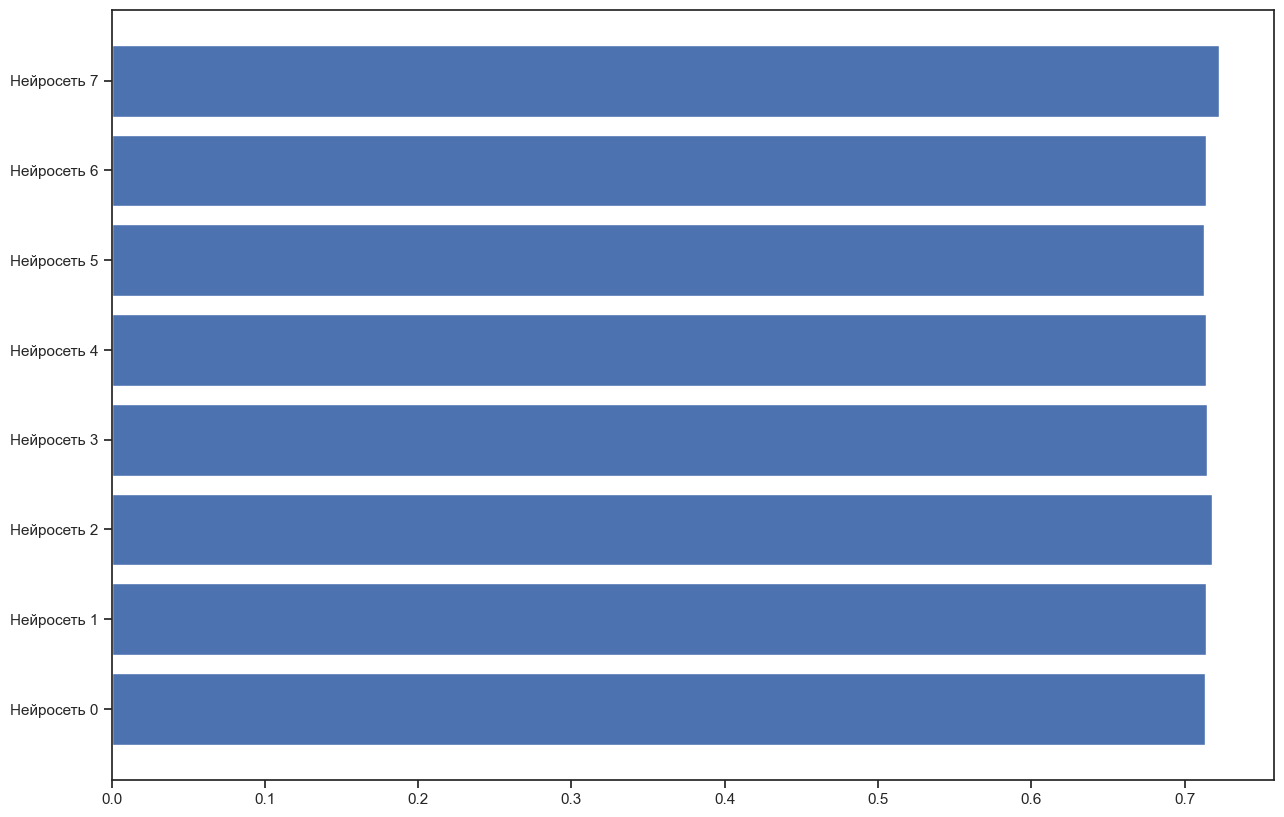

In [62]:
# Гистограмма ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Версия нейросети'], MAE_errors['MAE Соотношение матрица-наполнитель'])
plt.show()

In [153]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('./Datasets/MAE_errors.xlsx')
R2_errors.to_excel('./Datasets/R2_errors.xlsx')

In [20]:
model_y5.save('mn_model_nn')

INFO:tensorflow:Assets written to: mn_model_nn\assets


INFO:tensorflow:Assets written to: mn_model_nn\assets


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1300      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

Epoch 62/250
19/19 - 0s - loss: 7.4857 - mae: 2.5834 - val_loss: 7.6206 - val_mae: 2.6143 - 50ms/epoch - 3ms/step
Epoch 63/250
19/19 - 0s - loss: 7.3386 - mae: 2.5547 - val_loss: 7.4719 - val_mae: 2.5857 - 50ms/epoch - 3ms/step
Epoch 64/250
19/19 - 0s - loss: 7.1936 - mae: 2.5263 - val_loss: 7.3265 - val_mae: 2.5574 - 50ms/epoch - 3ms/step
Epoch 65/250
19/19 - 0s - loss: 7.0520 - mae: 2.4979 - val_loss: 7.1818 - val_mae: 2.5290 - 49ms/epoch - 3ms/step
Epoch 66/250
19/19 - 0s - loss: 6.9098 - mae: 2.4696 - val_loss: 7.0406 - val_mae: 2.5009 - 44ms/epoch - 2ms/step
Epoch 67/250
19/19 - 0s - loss: 6.7739 - mae: 2.4418 - val_loss: 6.9030 - val_mae: 2.4732 - 36ms/epoch - 2ms/step
Epoch 68/250
19/19 - 0s - loss: 6.6377 - mae: 2.4138 - val_loss: 6.7643 - val_mae: 2.4450 - 50ms/epoch - 3ms/step
Epoch 69/250
19/19 - 0s - loss: 6.5025 - mae: 2.3856 - val_loss: 6.6277 - val_mae: 2.4169 - 49ms/epoch - 3ms/step
Epoch 70/250
19/19 - 0s - loss: 6.3708 - mae: 2.3579 - val_loss: 6.4951 - val_mae: 2.389

Epoch 134/250
19/19 - 0s - loss: 1.6508 - mae: 1.0573 - val_loss: 1.6956 - val_mae: 1.0778 - 50ms/epoch - 3ms/step
Epoch 135/250
19/19 - 0s - loss: 1.6200 - mae: 1.0454 - val_loss: 1.6631 - val_mae: 1.0659 - 50ms/epoch - 3ms/step
Epoch 136/250
19/19 - 0s - loss: 1.5899 - mae: 1.0342 - val_loss: 1.6330 - val_mae: 1.0546 - 46ms/epoch - 2ms/step
Epoch 137/250
19/19 - 0s - loss: 1.5615 - mae: 1.0234 - val_loss: 1.6033 - val_mae: 1.0436 - 36ms/epoch - 2ms/step
Epoch 138/250
19/19 - 0s - loss: 1.5339 - mae: 1.0126 - val_loss: 1.5736 - val_mae: 1.0327 - 50ms/epoch - 3ms/step
Epoch 139/250
19/19 - 0s - loss: 1.5060 - mae: 1.0022 - val_loss: 1.5446 - val_mae: 1.0218 - 33ms/epoch - 2ms/step
Epoch 140/250
19/19 - 0s - loss: 1.4789 - mae: 0.9916 - val_loss: 1.5160 - val_mae: 1.0108 - 42ms/epoch - 2ms/step
Epoch 141/250
19/19 - 0s - loss: 1.4526 - mae: 0.9815 - val_loss: 1.4896 - val_mae: 1.0005 - 24ms/epoch - 1ms/step
Epoch 142/250
19/19 - 0s - loss: 1.4280 - mae: 0.9717 - val_loss: 1.4636 - val_m

Epoch 206/250
19/19 - 0s - loss: 0.8317 - mae: 0.7248 - val_loss: 0.8210 - val_mae: 0.7372 - 55ms/epoch - 3ms/step
Epoch 207/250
19/19 - 0s - loss: 0.8303 - mae: 0.7244 - val_loss: 0.8186 - val_mae: 0.7367 - 28ms/epoch - 1ms/step
Epoch 208/250
19/19 - 0s - loss: 0.8286 - mae: 0.7239 - val_loss: 0.8164 - val_mae: 0.7362 - 34ms/epoch - 2ms/step
Epoch 209/250
19/19 - 0s - loss: 0.8274 - mae: 0.7235 - val_loss: 0.8152 - val_mae: 0.7359 - 52ms/epoch - 3ms/step
Epoch 210/250
19/19 - 0s - loss: 0.8263 - mae: 0.7232 - val_loss: 0.8138 - val_mae: 0.7356 - 40ms/epoch - 2ms/step
Epoch 211/250
19/19 - 0s - loss: 0.8251 - mae: 0.7228 - val_loss: 0.8119 - val_mae: 0.7352 - 37ms/epoch - 2ms/step
Epoch 212/250
19/19 - 0s - loss: 0.8240 - mae: 0.7225 - val_loss: 0.8105 - val_mae: 0.7348 - 50ms/epoch - 3ms/step
Epoch 213/250
19/19 - 0s - loss: 0.8231 - mae: 0.7222 - val_loss: 0.8096 - val_mae: 0.7346 - 50ms/epoch - 3ms/step
Epoch 214/250
19/19 - 0s - loss: 0.8223 - mae: 0.7220 - val_loss: 0.8083 - val_m

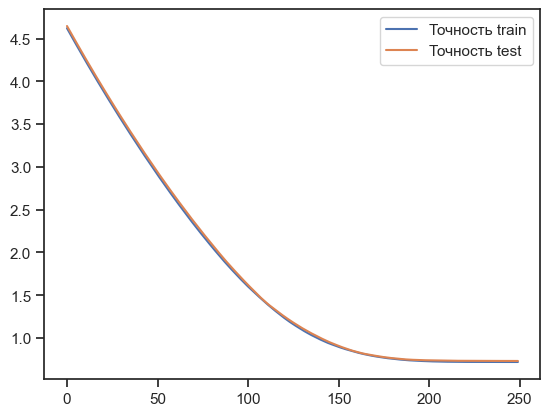

In [13]:
# НС на исходных очищенных данных (не нормализованных) 
model= Sequential()
model.add(Dense(100, input_dim=12, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(50, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
history = model.fit(X_train,y_train, 
                    epochs=250, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [10]:
y_pr = model.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr)
print (MAE)

9/9 [==============================] - 0s 3ms/step
0.7135400195297047


In [12]:
model.save('mn_model_nn1')

INFO:tensorflow:Assets written to: mn_model_nn1\assets


INFO:tensorflow:Assets written to: mn_model_nn1\assets


IndentationError: unexpected indent (3043628834.py, line 2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
19/19 - 1s - loss: 8.2272 - mae: 2.7223 - va

Epoch 64/150
19/19 - 0s - loss: 0.8219 - mae: 0.7218 - val_loss: 0.7843 - val_mae: 0.7309 - 40ms/epoch - 2ms/step
Epoch 65/150
19/19 - 0s - loss: 0.8526 - mae: 0.7391 - val_loss: 0.7863 - val_mae: 0.7331 - 42ms/epoch - 2ms/step
Epoch 66/150
19/19 - 0s - loss: 0.8304 - mae: 0.7246 - val_loss: 0.7857 - val_mae: 0.7328 - 39ms/epoch - 2ms/step
Epoch 67/150
19/19 - 0s - loss: 0.8574 - mae: 0.7401 - val_loss: 0.7812 - val_mae: 0.7294 - 41ms/epoch - 2ms/step
Epoch 68/150
19/19 - 0s - loss: 0.8302 - mae: 0.7258 - val_loss: 0.7819 - val_mae: 0.7306 - 41ms/epoch - 2ms/step
Epoch 69/150
19/19 - 0s - loss: 0.8305 - mae: 0.7277 - val_loss: 0.7872 - val_mae: 0.7326 - 43ms/epoch - 2ms/step
Epoch 70/150
19/19 - 0s - loss: 0.8392 - mae: 0.7306 - val_loss: 0.7860 - val_mae: 0.7329 - 42ms/epoch - 2ms/step
Epoch 71/150
19/19 - 0s - loss: 0.8413 - mae: 0.7305 - val_loss: 0.7857 - val_mae: 0.7326 - 40ms/epoch - 2ms/step
Epoch 72/150
19/19 - 0s - loss: 0.8242 - mae: 0.7282 - val_loss: 0.7880 - val_mae: 0.734

Epoch 136/150
19/19 - 0s - loss: 0.8269 - mae: 0.7253 - val_loss: 0.7879 - val_mae: 0.7339 - 59ms/epoch - 3ms/step
Epoch 137/150
19/19 - 0s - loss: 0.8187 - mae: 0.7210 - val_loss: 0.7853 - val_mae: 0.7310 - 42ms/epoch - 2ms/step
Epoch 138/150
19/19 - 0s - loss: 0.8085 - mae: 0.7147 - val_loss: 0.7870 - val_mae: 0.7322 - 43ms/epoch - 2ms/step
Epoch 139/150
19/19 - 0s - loss: 0.8182 - mae: 0.7257 - val_loss: 0.7902 - val_mae: 0.7333 - 42ms/epoch - 2ms/step
Epoch 140/150
19/19 - 0s - loss: 0.8159 - mae: 0.7221 - val_loss: 0.7902 - val_mae: 0.7337 - 40ms/epoch - 2ms/step
Epoch 141/150
19/19 - 0s - loss: 0.8121 - mae: 0.7231 - val_loss: 0.7905 - val_mae: 0.7334 - 41ms/epoch - 2ms/step
Epoch 142/150
19/19 - 0s - loss: 0.8116 - mae: 0.7216 - val_loss: 0.7904 - val_mae: 0.7341 - 40ms/epoch - 2ms/step
Epoch 143/150
19/19 - 0s - loss: 0.8104 - mae: 0.7227 - val_loss: 0.7904 - val_mae: 0.7335 - 42ms/epoch - 2ms/step
Epoch 144/150
19/19 - 0s - loss: 0.8243 - mae: 0.7227 - val_loss: 0.7903 - val_m

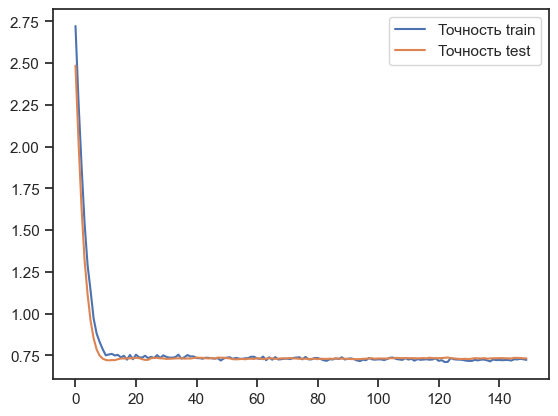

In [20]:
# 8
model_y8= Sequential()
model_y8.add(Dense(32, input_dim=12, activation='sigmoid'))
model_y8.add(Dropout(0.5))
model_y8.add(LeakyReLU(alpha=1.0))
model_y8.add(Dense(16, activation='sigmoid'))

#IMPORTANT PART
model_y8.add(Dense(1, activation='linear'))
model_y8.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y8.summary()
history = model_y8.fit(X_train,y_train, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [21]:
y_pr8 = model_y8.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr8)
print (MAE)

9/9 [==============================] - 0s 867us/step
0.7140276202901099


In [23]:
model_y8.save('mn_model_nn8')

INFO:tensorflow:Assets written to: mn_model_nn8\assets


INFO:tensorflow:Assets written to: mn_model_nn8\assets
